In [1]:
import sys
sys.path.append('../code/')

In [2]:
############## Load Confusion Matrices #############
import numpy as np
cm = list(np.load('cm-example.npy', allow_pickle = True))

# This example file contains 18 whole slide images, each annotated across several ROIs
print(len(cm))

# The first whole slide image contains 5 ROIs:
print(len(cm[0]))

# Confusion matrix for the first ROI of the first WSI:
print(cm[0][0])
# As can be seen from the confusion matrix, this is a 3-class segmentation task (3*3 confusion matrix)

18
5
[[251114. 198161.    473.]
 [     0.      0.      0.]
 [     0.      0.      0.]]


In [3]:
############## Calculate Final Dice Score Values #############
from calculate_dice_wsi import calculate_dice_wsi
point_estimate = calculate_dice_wsi(cm)

# This array contains the Dice point estimates for the 3 classes across the 4 different ways of obtianing the Dice estimates.
print(point_estimate)

[[0.5541 0.8256 0.6994]
 [0.4421 0.8567 0.6084]
 [0.4728 0.7668 0.637 ]
 [0.5212 0.8146 0.6166]]


In [23]:
############## Calculate Final Dice Score Values and Confidence Intervals #############
from calculate_dice_bootstrap_cases import calculate_dice_bootstrap_cases
point_estimate,std,lb,ub = calculate_dice_bootstrap_cases(cm, nboots = 2000, confidence_level = 95)

print(point_estimate)
print(lb)
print(ub)
      

Boostrapping Samples: 100%|██████████| 2000/2000 [00:57<00:00, 34.49it/s]


[[0.5541 0.8256 0.6994]
 [0.4421 0.8567 0.6084]
 [0.4728 0.7668 0.637 ]
 [0.5212 0.8146 0.6166]]
[[0.3345 0.7553 0.5621]
 [0.3175 0.8052 0.4822]
 [0.3194 0.6581 0.4992]
 [0.3822 0.7082 0.489 ]]
[[0.7094 0.8681 0.8074]
 [0.5728 0.8992 0.7271]
 [0.627  0.8495 0.7533]
 [0.6597 0.8902 0.7339]]


[0.5541 0.4421 0.4728 0.5212]
[array([0.2196, 0.1246, 0.1534, 0.139 ]), array([0.1553, 0.1307, 0.1542, 0.1385])]
[0.8256 0.8567 0.7668 0.8146]
[array([0.0703, 0.0515, 0.1087, 0.1064]), array([0.0425, 0.0425, 0.0827, 0.0756])]
[0.6994 0.6084 0.637  0.6166]
[array([0.1373, 0.1262, 0.1378, 0.1276]), array([0.108 , 0.1187, 0.1163, 0.1173])]


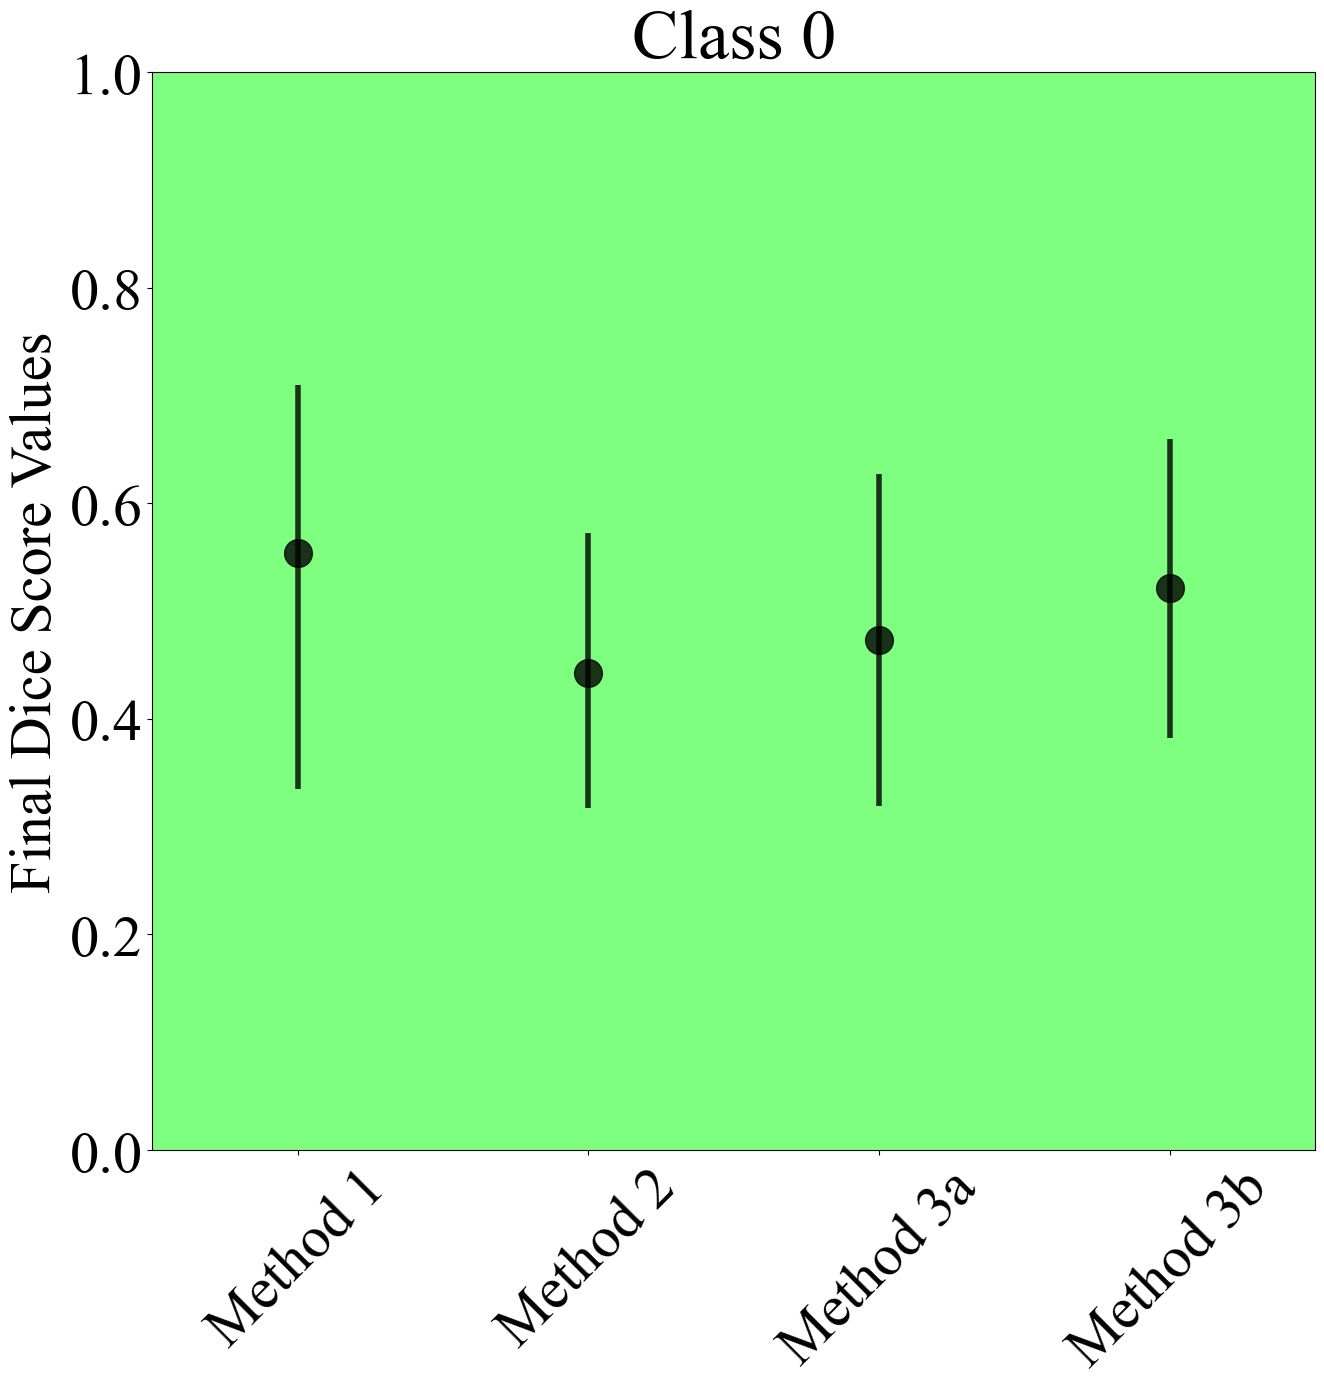

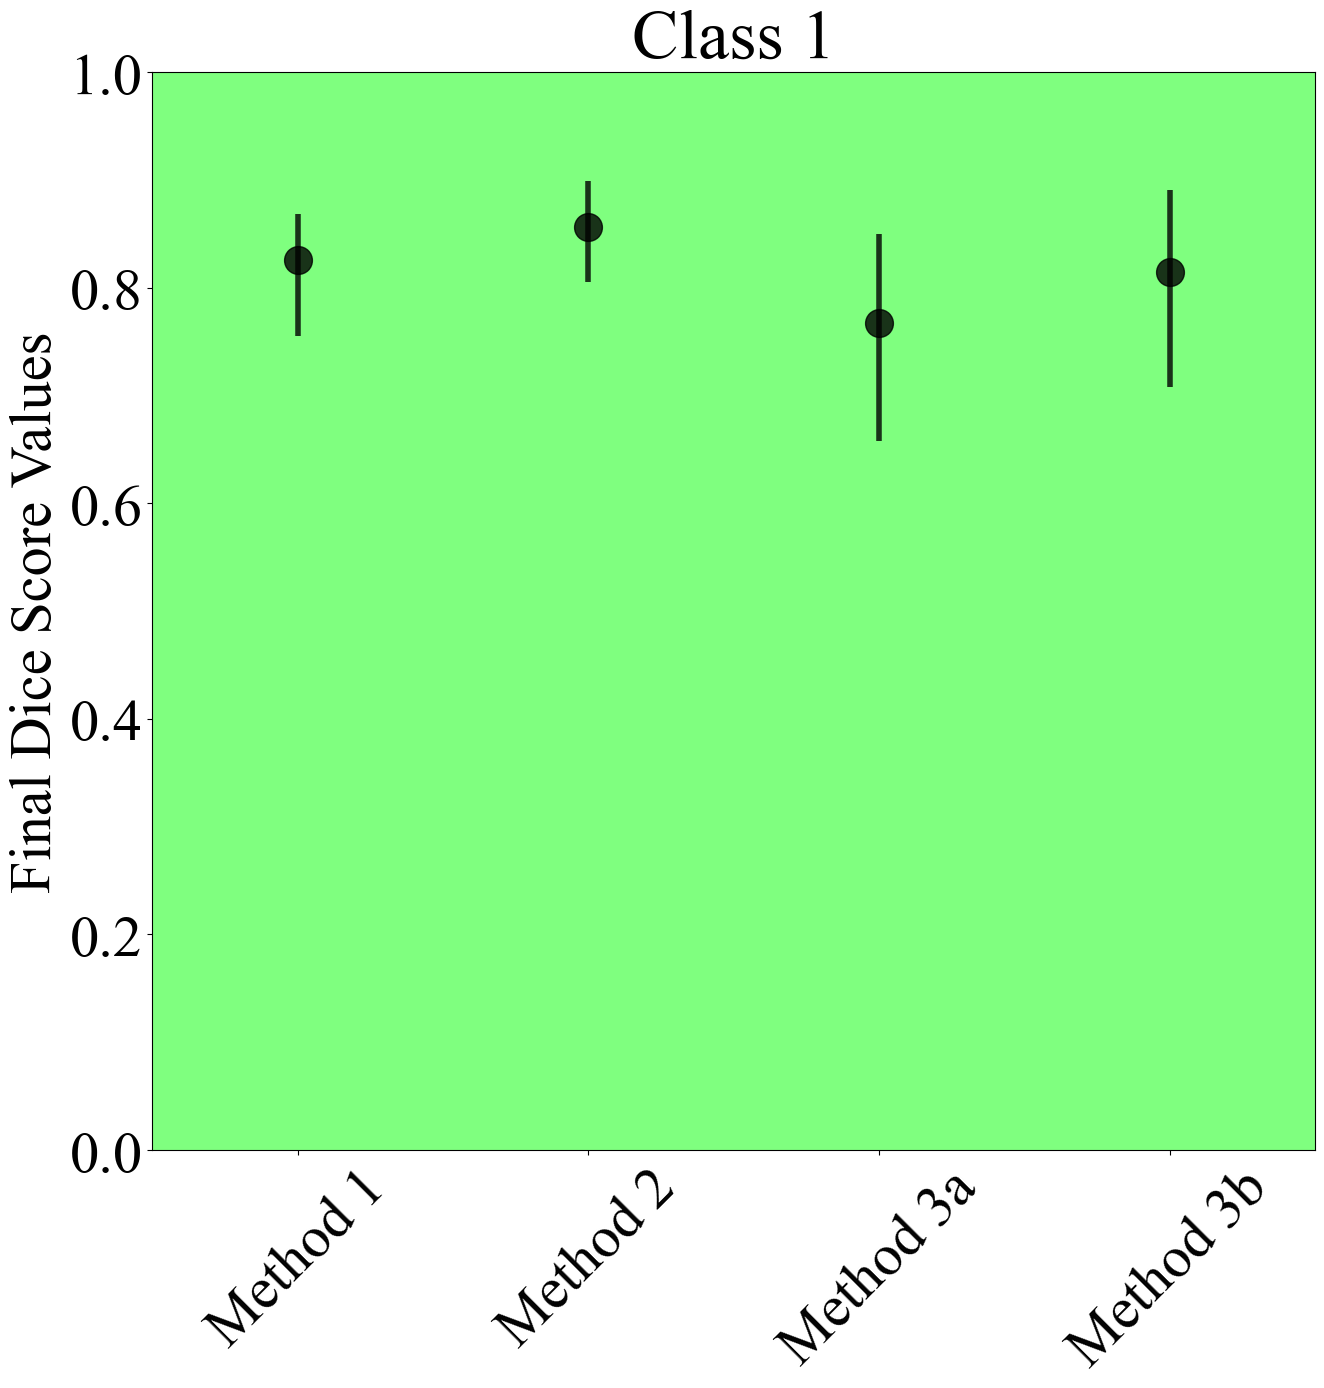

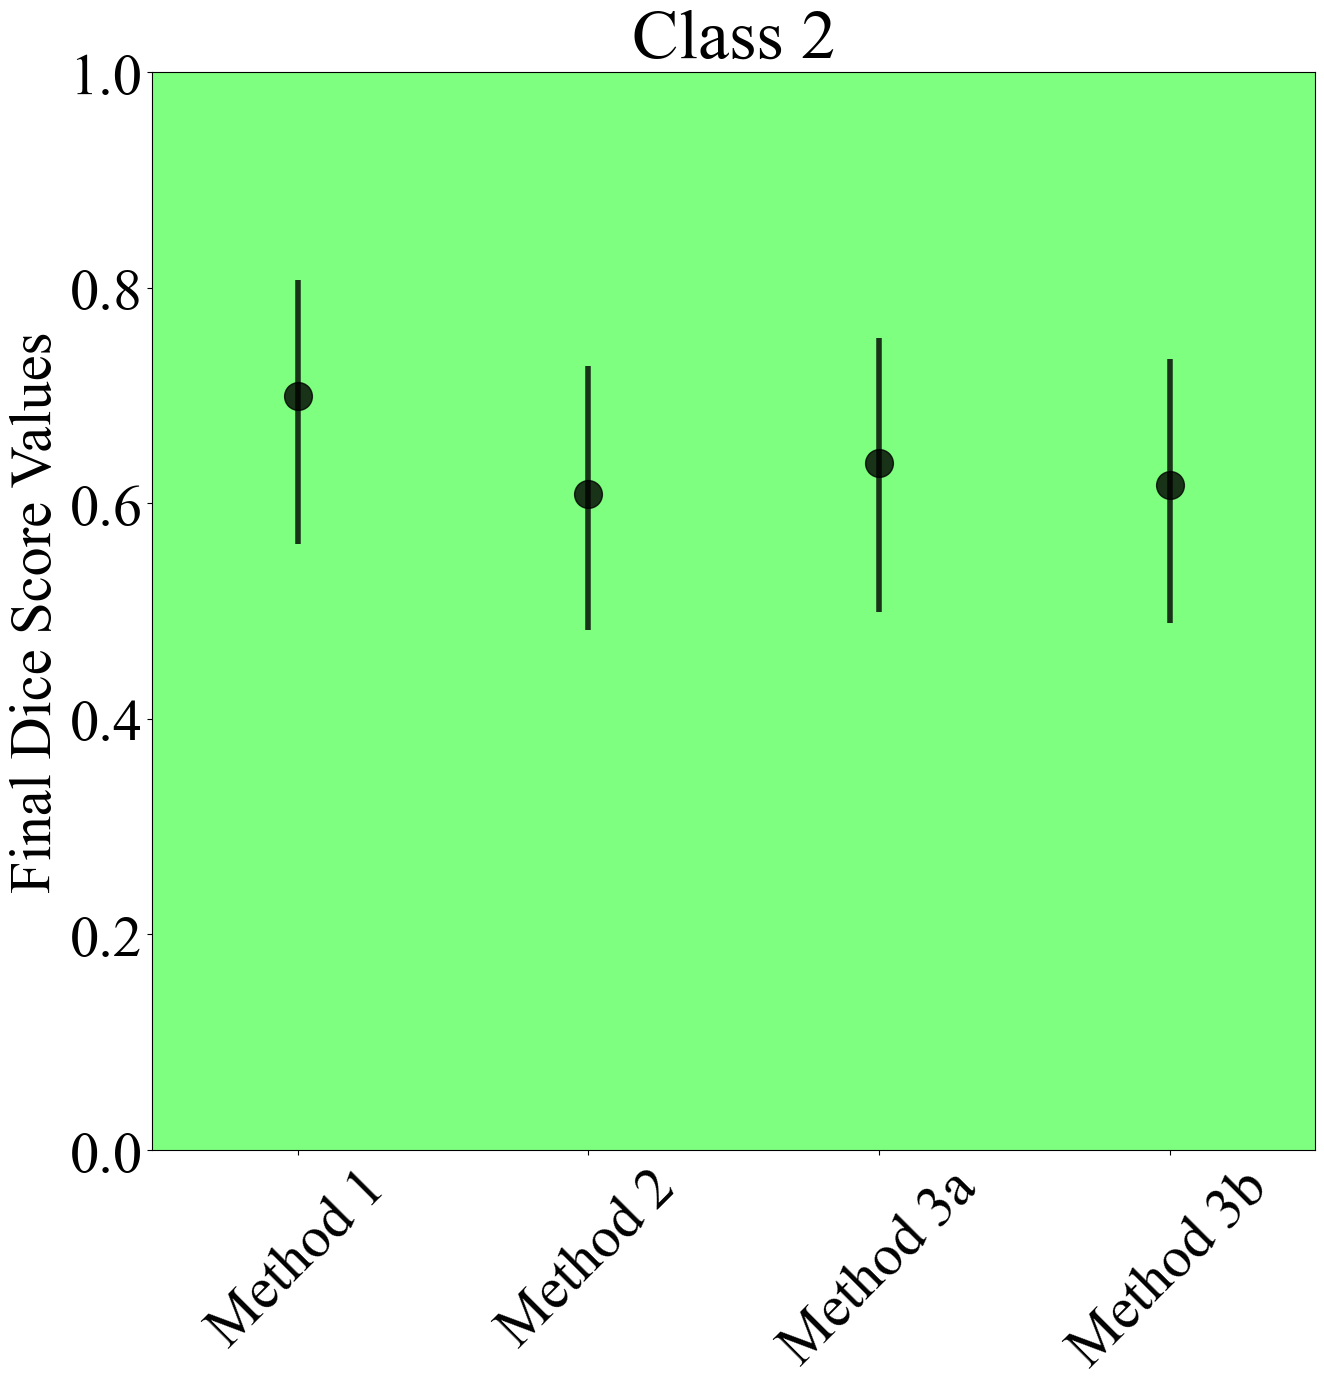

In [24]:
############## Plot Final Dice Score Values and Confidence Intervals #############
from plot_dice_values import plot_dice_values
plot_dice_values(point_estimate, lb, ub)

[[3.40000e+02 2.53760e+04 3.66200e+03]
 [6.42600e+03 7.38265e+05 1.03626e+05]
 [1.31490e+04 9.77830e+04 5.55409e+05]]


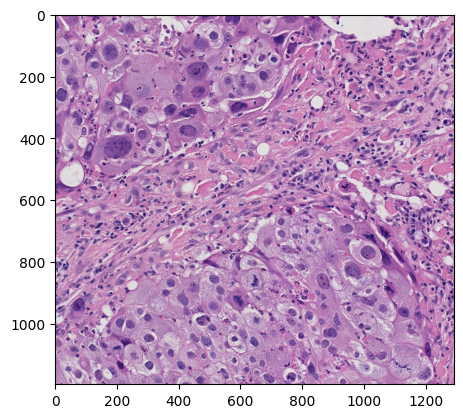

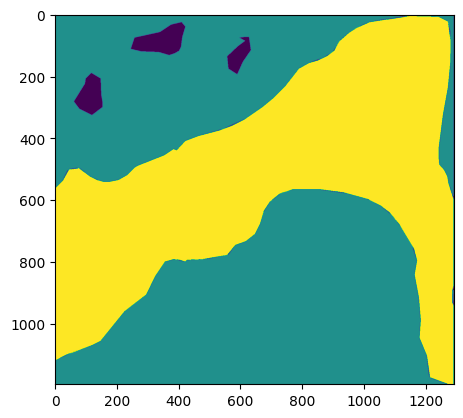

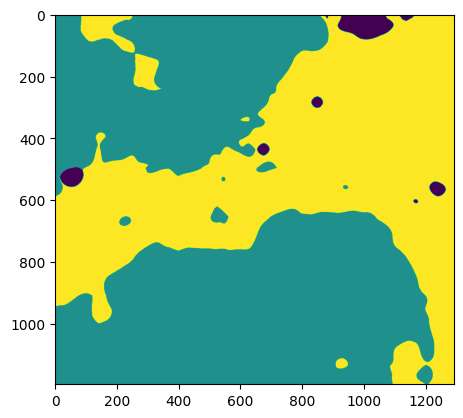

In [4]:
############## Example ROI with Ground Truth and Prediction Labels #############
example_roi = np.load('mask-pred-example.npy', allow_pickle = True).item(0)
img = example_roi['img']
gt = example_roi['gt']
pred = example_roi['prediction']
del example_roi

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(img)
plt.plot()

plt.figure()
plt.imshow(gt)
plt.plot()

plt.figure()
plt.imshow(pred)
plt.plot()

from calculate_cm import calculate_cm
cm_roi = calculate_cm(gt, pred, number_of_classes=3)

print(cm_roi)